**Reference:** https://medium.com/@geronimo7/mamba-a-shallow-dive-into-a-new-architecture-for-llms-54c70ade5957

In [1]:
!pip install -q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00
time: 331 µs (started: 2024-02-16 17:22:57 +00:00)


In [2]:
!pip install -qqq git+https://github.com/huggingface/transformers --progress-bar off
!pip install -qqq git+https://github.com/huggingface/datasets --progress-bar off
!pip install -qqq git+https://github.com/huggingface/peft --progress-bar off
!pip install -qqq git+https://github.com/huggingface/accelerate --progress-bar off
!pip install -qqq --upgrade bitsandbytes --progress-bar off
!pip install -qqq git+https://github.com/huggingface/trl --progress-bar off
!pip install -qqq --upgrade safetensors --progress-bar off
!pip install -qqq evaluate --progress-bar off
!pip install -qqq gputil psutil --progress-bar off
!pip install -qqq wandb --progress-bar off
!pip install -qqq matplotlib --progress-bar off
!pip install -qqq sentencepiece --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
time: 2min 2

In [3]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         167G   28G  140G  17% /
tmpfs            64M     0   64M   0% /dev
shm              41G     0   41G   0% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
tmpfs            42G  2.9M   42G   1% /var/colab
/dev/sda1       174G   30G  144G  17% /opt/bin/.nvidia
tmpfs            42G     0   42G   0% /proc/acpi
tmpfs            42G     0   42G   0% /proc/scsi
tmpfs            42G     0   42G   0% /sys/firmware
time: 105 ms (started: 2024-02-16 17:25:22 +00:00)


In [8]:
!pip install -qqq causal-conv1d==1.0.0 mamba-ssm==1.0.1

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.1 MB/s eta 0:00:00
time: 25.1 s (started: 2024-02-16 17:25:37 +00:00)


In [9]:
#fix AssertionError: libcuda.so cannot found!
!echo /usr/lib64-nvidia/ >/etc/ld.so.conf.d/libcuda.conf; ldconfig


/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

time: 1.41 s (started: 2024-02-16 17:26:02 +00:00)


In [10]:
import wandb

time: 416 µs (started: 2024-02-16 17:26:04 +00:00)


In [11]:
import torch
from mamba_ssm.models.mixer_seq_simple import MambaLMHeadModel
from transformers import AutoTokenizer, TrainingArguments

# Load model
model = MambaLMHeadModel.from_pretrained(
  "state-spaces/mamba-1.4b",
  device="cuda",
  dtype=torch.bfloat16)

# Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.49G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/457k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


time: 4min 8s (started: 2024-02-16 17:26:04 +00:00)


In [12]:
print(tokenizer)

GPTNeoXTokenizerFast(name_or_path='EleutherAI/gpt-neox-20b', vocab_size=50254, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<|padding|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50254: AddedToken("                        ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50255: AddedToken("                       ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50256: AddedToken("                      ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50257: AddedToken("                     ",

In [15]:
tokenizer.pad_token, tokenizer.eos_token

(None, '<|endoftext|>')

time: 2.37 ms (started: 2024-02-16 17:31:09 +00:00)


In [16]:
tokenizer.pad_token = tokenizer.eos_token

time: 616 µs (started: 2024-02-16 17:31:49 +00:00)


In [17]:
print(tokenizer.pad_token )

<|endoftext|>
time: 710 µs (started: 2024-02-16 17:31:59 +00:00)


In [13]:
print(model)

MambaLMHeadModel(
  (backbone): MixerModel(
    (embedding): Embedding(50280, 2048)
    (layers): ModuleList(
      (0-47): 48 x Block(
        (mixer): Mamba(
          (in_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (conv1d): Conv1d(4096, 4096, kernel_size=(4,), stride=(1,), padding=(3,), groups=4096)
          (act): SiLU()
          (x_proj): Linear(in_features=4096, out_features=160, bias=False)
          (dt_proj): Linear(in_features=128, out_features=4096, bias=True)
          (out_proj): Linear(in_features=4096, out_features=2048, bias=False)
        )
        (norm): RMSNorm()
      )
    )
    (norm_f): RMSNorm()
  )
  (lm_head): Linear(in_features=2048, out_features=50280, bias=False)
)
time: 2.28 ms (started: 2024-02-16 17:30:15 +00:00)


In [19]:
from datasets import load_dataset

dataset=load_dataset("OpenAssistant/oasst_top1_2023-08-25")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

time: 10.3 s (started: 2024-02-16 17:32:17 +00:00)


In [20]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 12947
    })
    test: Dataset({
        features: ['text'],
        num_rows: 690
    })
})

time: 2.28 ms (started: 2024-02-16 17:32:28 +00:00)


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

time: 438 µs (started: 2024-02-16 17:32:28 +00:00)


In [22]:
# Function to calculate word lengths
def calculate_word_lengths(dataset):
    word_lengths = [len(text.split()) for text in dataset['text']]
    return word_lengths

time: 457 µs (started: 2024-02-16 17:32:28 +00:00)


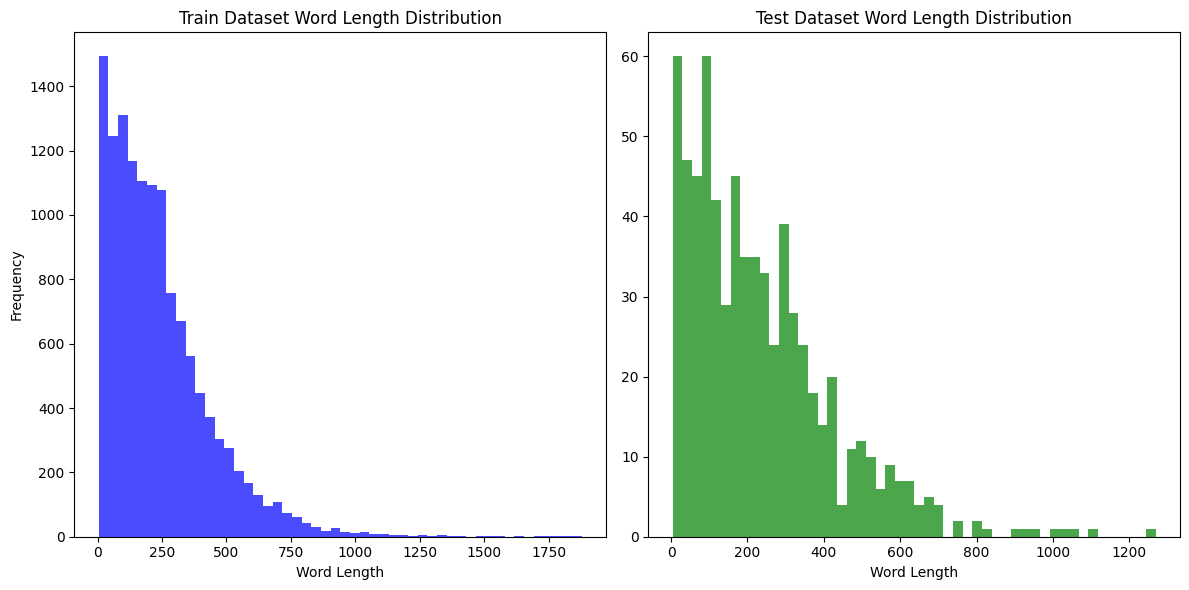

time: 865 ms (started: 2024-02-16 17:32:28 +00:00)


In [23]:
# Calculate word lengths for train and test sets
word_lengths_train = calculate_word_lengths(dataset['train'])
word_lengths_test = calculate_word_lengths(dataset['test'])

# Convert to Pandas DataFrame for visualization
df_train = pd.DataFrame({'Word Length': word_lengths_train})
df_test = pd.DataFrame({'Word Length': word_lengths_test})

# Plotting histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_train['Word Length'], bins=50, color='blue', alpha=0.7)
plt.title('Train Dataset Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_test['Word Length'], bins=50, color='green', alpha=0.7)
plt.title('Test Dataset Word Length Distribution')
plt.xlabel('Word Length')

plt.tight_layout()
plt.show()


In [24]:
# Print statistics
print("Train Dataset Stats:")
print(f"Minimum Word Length: {min(word_lengths_train)}")
print(f"Maximum Word Length: {max(word_lengths_train)}")
print(f"Average Word Length: {sum(word_lengths_train) / len(word_lengths_train):.2f}")

print("\nTest Dataset Stats:")
print(f"Minimum Word Length: {min(word_lengths_test)}")
print(f"Maximum Word Length: {max(word_lengths_test)}")
print(f"Average Word Length: {sum(word_lengths_test) / len(word_lengths_test):.2f}")

Train Dataset Stats:
Minimum Word Length: 4
Maximum Word Length: 1879
Average Word Length: 238.33

Test Dataset Stats:
Minimum Word Length: 4
Maximum Word Length: 1269
Average Word Length: 235.92
time: 1.57 ms (started: 2024-02-16 17:32:29 +00:00)


In [25]:
dataset["train"][0]

{'text': '<|im_start|>user\nConsigliami 5 nomi per il mio cucciolo di dobberman<|im_end|>\n<|im_start|>assistant\nEcco 5 nomi per il tuo cucciolo di dobermann:\n\n- Zeus\n- Apollo\n- Thor\n- Athena\n- Odin<|im_end|>\n'}

time: 2.98 ms (started: 2024-02-16 17:32:29 +00:00)


In [26]:
dataset["test"][0]

{'text': "<|im_start|>user\nExplain Calculus to a primary school student<|im_end|>\n<|im_start|>assistant\nCalculus is a type of math that helps us understand how things change. It's like a superpower that lets us study things that are constantly moving or growing. \n\nThere are two important parts of calculus: differentiation and integration. Let's start with differentiation. Imagine you have a line that represents how fast something is moving at different points. Calculus helps us find out how steep or flat that line is at any given point. It's like figuring out if something is going really fast or slow, or if it's speeding up or slowing down.\n\nNow let's talk about integration. Imagine you have a line that represents how much something is changing over time. Integration helps us find out the total amount of change over a certain period. It's like adding up all the little changes to see the big picture.\n\nCalculus is used in many areas, like physics, engineering, and even economics

time: 2.9 ms (started: 2024-02-16 17:32:29 +00:00)


In [27]:
import os

def tokenize(element):
    return tokenizer(
        element["text"],
        truncation=True,
        max_length=1024,
        add_special_tokens=False,
    )

dataset_tokenized = dataset.map(
    tokenize,
    batched=True,
    num_proc=os.cpu_count(),    # multithreaded
    remove_columns=["text"]     # don't need this anymore, we have tokens from here on
)

Map (num_proc=12):   0%|          | 0/12947 [00:00<?, ? examples/s]

Map (num_proc=12):   0%|          | 0/690 [00:00<?, ? examples/s]

time: 4.14 s (started: 2024-02-16 17:32:29 +00:00)


In [28]:
# collate function - to transform list of dictionaries [ {input_ids: [123, ..]}, {.. ] to single batch dictionary { input_ids: [..], labels: [..], attention_mask: [..] }
def collate(elements):
    tokenlist=[e["input_ids"] for e in elements]
    tokens_maxlen=max([len(t) for t in tokenlist])

    input_ids,labels = [],[]
    for tokens in tokenlist:
        pad_len=tokens_maxlen-len(tokens)

        # pad input_ids with pad_token, labels with ignore_index (-100) and set attention_mask 1 where content otherwise 0
        input_ids.append( tokens + [tokenizer.pad_token_id]*pad_len )
        labels.append( tokens + [-100]*pad_len )

    batch={
        "input_ids": torch.tensor(input_ids),
        "labels": torch.tensor(labels),
    }
    return batch

time: 876 µs (started: 2024-02-16 17:32:37 +00:00)


In [29]:
os.cpu_count()

12

time: 2.92 ms (started: 2024-02-16 17:32:47 +00:00)


In [30]:
# monkey patch MambaLMHeadModel.forward
def forward_with_loss(self, input_ids, position_ids=None, inference_params=None, num_last_tokens=0, labels = None):
    """
    "position_ids" is just to be compatible with Transformer generation. We don't use it.
    num_last_tokens: if > 0, only return the logits for the last n tokens
    """
    hidden_states = self.backbone(input_ids, inference_params=inference_params)
    if num_last_tokens > 0:
        hidden_states = hidden_states[:, -num_last_tokens:]
    lm_logits = self.lm_head(hidden_states)

    # Source: https://github.com/huggingface/transformers/blob/80377eb018c077dba434bc8e7912bcaed3a64d09/src/transformers/models/llama/modeling_llama.py#L1196
    from torch.nn import CrossEntropyLoss
    if labels is not None:
        logits = lm_logits
        # Shift so that tokens < n predict n
        shift_logits = logits[..., :-1, :].contiguous()
        shift_labels = labels[..., 1:].contiguous()
        # Flatten the tokens
        loss_fct = CrossEntropyLoss()
        # shift_logits = shift_logits.view(-1, self.config.vocab_size)
        shift_logits = shift_logits.view(-1, self.backbone.embedding.weight.size()[0])
        shift_labels = shift_labels.view(-1)
        # Enable model parallelism
        shift_labels = shift_labels.to(shift_logits.device)
        loss = loss_fct(shift_logits, shift_labels)
        return (loss,)
    else:
        CausalLMOutput = namedtuple("CausalLMOutput", ["logits"])
        return CausalLMOutput(logits=lm_logits)
MambaLMHeadModel.forward=forward_with_loss

# patch MambaLMHeadModel
MambaLMHeadModel.forward=forward_with_loss

# (re)load model
model = MambaLMHeadModel.from_pretrained("state-spaces/mamba-1.4b", device="cuda", dtype=torch.bfloat16)

time: 5.67 s (started: 2024-02-16 17:32:48 +00:00)


In [31]:
from transformers import Trainer, TrainingArguments

bs=4        # batch size
ga_steps=1  # gradient acc. steps
epochs=3
steps_per_epoch=len(dataset_tokenized["train"])//(bs*ga_steps)
lr=0.0005

args = TrainingArguments(
    output_dir="mamba-1.4b-openassistant-conversations",
    per_device_train_batch_size=bs,
    per_device_eval_batch_size=bs,
    evaluation_strategy="steps",
    logging_steps=1,
    eval_steps=steps_per_epoch,
    save_steps=steps_per_epoch,
    gradient_accumulation_steps=ga_steps,
    num_train_epochs=epochs,
    lr_scheduler_type="cosine",
    learning_rate=lr,
    group_by_length=True,
    bf16=True,                  # mixed precision training
    save_safetensors=False,     # saving will fail without this
    seed = 42
)

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=args,
    data_collator=collate,
    train_dataset=dataset_tokenized["train"],
    eval_dataset=dataset_tokenized["test"],
)



time: 3.18 s (started: 2024-02-16 17:33:07 +00:00)


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:437: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [32]:
# Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA A100-SXM4-40GB. Max memory = 39.564 GB.
5.33 GB of memory reserved.
time: 1.05 ms (started: 2024-02-16 17:33:10 +00:00)


In [33]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         167G   33G  135G  20% /
tmpfs            64M     0   64M   0% /dev
shm              41G  4.0K   41G   1% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
tmpfs            42G  4.5M   42G   1% /var/colab
/dev/sda1       174G   35G  139G  21% /opt/bin/.nvidia
tmpfs            42G     0   42G   0% /proc/acpi
tmpfs            42G     0   42G   0% /proc/scsi
tmpfs            42G     0   42G   0% /sys/firmware
time: 107 ms (started: 2024-02-16 17:33:10 +00:00)


In [34]:
wandb.init(project="mamba_vs_llama_vs_roberta_vs_bert", entity="drishtisharma96505", group='mamba_w_cosine_lr', name='mamba')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


time: 21.6 s (started: 2024-02-16 17:34:14 +00:00)


In [35]:
import time

time: 684 µs (started: 2024-02-16 17:34:35 +00:00)


In [36]:
start_time = time.time()  # Start timer

trainer_stats = trainer.train()

end_time = time.time()  # End timer
training_duration = (end_time - start_time)/60

print(f"Training Time: {training_duration} minutes")

Step,Training Loss,Validation Loss
3236,1.994000,2.381974
6472,0.824600,2.094370
9708,0.241100,2.433749


Training Time: 47.97289132277171 minutes
time: 47min 58s (started: 2024-02-16 17:34:35 +00:00)


In [37]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

2872.6896 seconds used for training.
47.88 minutes used for training.
Peak reserved memory = 20.143 GB.
Peak reserved memory for training = 14.813 GB.
Peak reserved memory % of max memory = 50.912 %.
Peak reserved memory for training % of max memory = 37.441 %.
time: 6.35 ms (started: 2024-02-16 18:22:34 +00:00)


In [38]:
from huggingface_hub import notebook_login
notebook_login()

time: 22.2 ms (started: 2024-02-16 18:22:34 +00:00)


In [46]:
model.save_pretrained("new_model")

AttributeError: 'MambaLMHeadModel' object has no attribute 'save_pretrained'

time: 22.6 ms (started: 2024-02-16 18:42:40 +00:00)


In [40]:
from transformers import AutoConfig

# Assuming `model` is your MambaLMHeadModel instance
model.config = AutoConfig.from_pretrained('mamba-1.4b-openassistant-conversations')


OSError: mamba-1.4b-openassistant-conversations does not appear to have a file named config.json. Checkout 'https://huggingface.co/mamba-1.4b-openassistant-conversations/None' for available files.

time: 28.1 ms (started: 2024-02-16 18:27:41 +00:00)


In [42]:
from transformers import AutoConfig

# Replace 'your_checkpoint_directory' with the actual checkpoint directory, e.g., 'checkpoint-6472'
config = AutoConfig.from_pretrained('/content/mamba-1.4b-openassistant-conversations/checkpoint-9708')
model.config = config


OSError: /content/mamba-1.4b-openassistant-conversations/checkpoint-9708 does not appear to have a file named config.json. Checkout 'https://huggingface.co//content/mamba-1.4b-openassistant-conversations/checkpoint-9708/None' for available files.

time: 38.5 ms (started: 2024-02-16 18:31:56 +00:00)


In [41]:
trainer.push_to_hub()

AttributeError: 'MambaLMHeadModel' object has no attribute 'config'

time: 6.15 s (started: 2024-02-16 18:27:41 +00:00)


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from mamba_ssm.models.mixer_seq_simple import MambaLMHeadModel

CHAT_TEMPLATE_ID = "HuggingFaceH4/zephyr-7b-beta"

device = "cuda:0" if torch.cuda.is_available() else "cpu"
model_name = "mamba-1.4b-openassistant-conversations"

eos_token = "<|endoftext|>"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.eos_token = eos_token
tokenizer.pad_token = tokenizer.eos_token
tokenizer.chat_template = AutoTokenizer.from_pretrained(CHAT_TEMPLATE_ID).chat_template

model = MambaLMHeadModel.from_pretrained(
        model_name, device=device, dtype=torch.float16)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:

messages = []
prompt = "Tell me 5 sites to visit in Bangalore"
messages.append(dict(role="user", content=prompt))

input_ids = tokenizer.apply_chat_template(
            messages, return_tensors="pt", add_generation_prompt=True
).to(device)

out = model.generate(
    input_ids=input_ids,
    max_length=2000,
    temperature=0.9,
    top_p=0.7,
    eos_token_id=tokenizer.eos_token_id,
)

decoded = tokenizer.batch_decode(out)
assistant_message = (
    decoded[0].split("<|assistant|>\n")[-1].replace(eos_token, "")
)

messages.append(dict(role="assistant", content=assistant_message))


print(assistant_message)


1. Mysore Palace: This is a royal palace located in Mysore, Karnataka, India. It is one of the most popular tourist attractions in the city.

2. St. Mary’s Church: This is a historic church located in the heart of Bangalore. It is a popular tourist spot and is known for its beautiful architecture.

3. Cubbon Park: This is a large public park located in the heart of Bangalore. It is a popular spot for people to relax, walk, and enjoy the beautiful weather.

4. Vidhana Soudha: This is the administrative headquarters of the Karnataka state government. It is a beautiful building with a lot of historical significance.

5. Lalbagh Fort: This is a fort located in the heart of Bangalore. It is a popular tourist spot and is known for its beautiful gardens and architecture.
